<a href="https://colab.research.google.com/github/HEM2058/sentinelhub_remote_sensing/blob/main/Yield_Estimation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Define the path to the CSV file
file_path = "/content/drive/MyDrive/Yield_DATA/Updated_User_Inputted_Data_with_GIS_Variability.csv"

# Attempt to read the CSV file with a different encoding
try:
    data = pd.read_csv(file_path, encoding="latin1")  # You can also try 'ISO-8859-1'
    print(data.columns)
except UnicodeDecodeError as e:
    print("UnicodeDecodeError:", e)


Index(['Year', 'Crop Name', 'Planting Date', 'Harvesting Date',
       'Yield Value (kg/ha)', 'Estimated Yield Value (kg/ha)',
       'Fertilizer Type', 'Fertilizer Quantity (kg/ha)',
       'Fertilizer Application Date', 'Pesticide Type',
       'Pesticide Quantity (L/ha)', 'Pesticide Application Date', 'SOC (%)',
       'pH', 'Bulk Density (g/cm³)', 'CEC (cmol/kg)', 'Weed Management',
       'Irrigation Type', 'Irrigation Frequency', 'Water Volume per Cycle',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'NDVI Mean', 'SAVI Mean',
       'NDWI Mean', 'BSI Mean', 'MSAVI Mean', 'Temperature Mean (C)',
       'Cumulative Precipitation (mm)'],
      dtype='object')


In [3]:
# Select the relevant columns
columns_of_interest = [
    'Year',
    'Yield Value (kg/ha)',
    'NDVI Mean',
    'SAVI Mean',
    'NDWI Mean',
    'BSI Mean',
    'MSAVI Mean',
    'Temperature Mean (C)',
    'Cumulative Precipitation (mm)'
]

# Filter the data
filtered_data = data[columns_of_interest]

# Display the filtered DataFrame
print(filtered_data.head())

   Year  Yield Value (kg/ha)  NDVI Mean  SAVI Mean  NDWI Mean  BSI Mean  \
0  2014               4200.0        NaN        NaN        NaN       NaN   
1  2014                  NaN        NaN        NaN        NaN       NaN   
2  2015               4300.0   0.237212   0.394380  -0.216067 -0.119702   
3  2015                  NaN   0.237212   0.411887  -0.236202 -0.089347   
4  2016               4400.0   0.329486   0.376744  -0.216071 -0.103617   

   MSAVI Mean  Temperature Mean (C)  Cumulative Precipitation (mm)  
0         NaN             18.298815                       6.162172  
1         NaN             18.298815                       6.162172  
2    0.358803             19.603492                       2.743627  
3    0.371910             19.603492                       2.743627  
4    0.346671             20.151376                       5.003225  


In [4]:
# Filter the data to include only rows where 'Yield Value (kg/ha)' is not NaN
filtered_data = data[columns_of_interest].dropna(subset=['Yield Value (kg/ha)'])

# Display the filtered DataFrame
print(filtered_data.head())

   Year  Yield Value (kg/ha)  NDVI Mean  SAVI Mean  NDWI Mean  BSI Mean  \
0  2014               4200.0        NaN        NaN        NaN       NaN   
2  2015               4300.0   0.237212   0.394380  -0.216067 -0.119702   
4  2016               4400.0   0.329486   0.376744  -0.216071 -0.103617   
6  2017               4700.0   0.304098   0.413011  -0.224016 -0.104008   
8  2018               4800.0   0.214187   0.372037  -0.275694 -0.124028   

   MSAVI Mean  Temperature Mean (C)  Cumulative Precipitation (mm)  
0         NaN             18.298815                       6.162172  
2    0.358803             19.603492                       2.743627  
4    0.346671             20.151376                       5.003225  
6    0.357678             19.434456                       3.651395  
8    0.357657             18.043540                       5.267857  


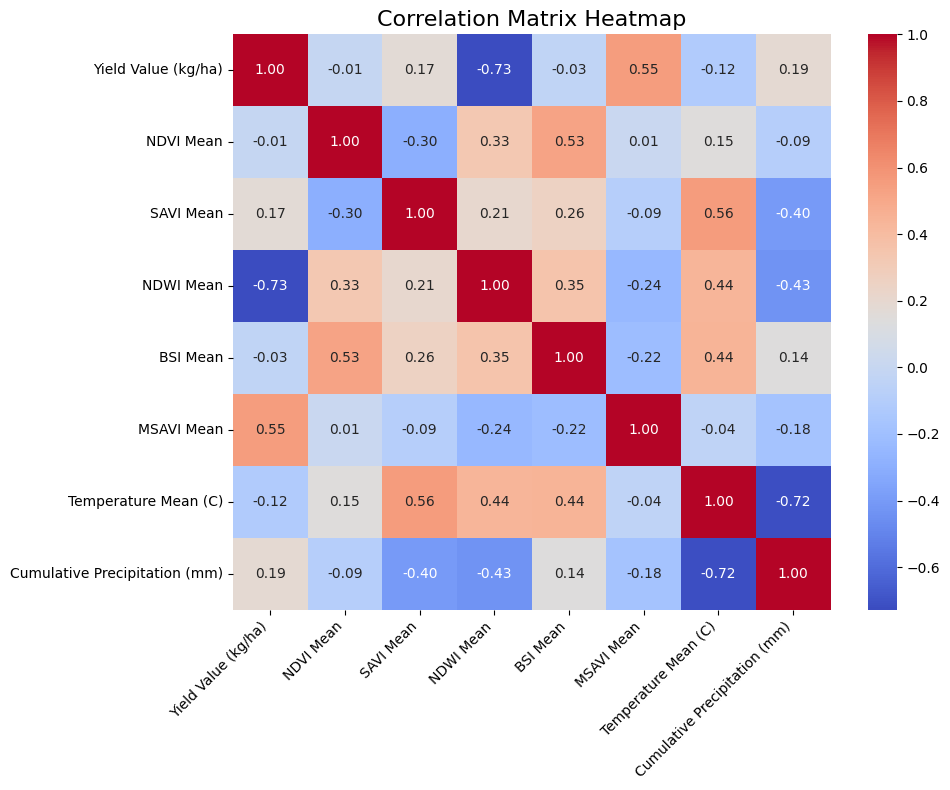

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Make sure this import is included

# Filter the data to include only rows where 'Yield Value (kg/ha)' is not NaN
filtered_data = data[columns_of_interest].dropna(subset=['Yield Value (kg/ha)'])

# Filter data for Year >= 2015
filtered_data = filtered_data[filtered_data['Year'] >= 2015]

# Drop the 'Year' column as it's not a feature
filtered_data_no_year = filtered_data.drop(columns=['Year'])

# Calculate the correlation matrix
correlation_matrix = filtered_data_no_year.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Ensure the figure is created
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()